In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train = pd.read_csv("../Data/Titanic/train.csv")
test = pd.read_csv("../Data/Titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### EDA - Exploratory Data Analysis

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Missing Values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


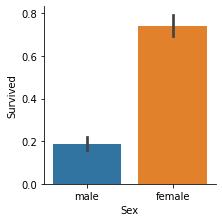

In [10]:
sns.catplot(x="Sex", y ="Survived", data=train, kind="bar", height=3)
plt.show()

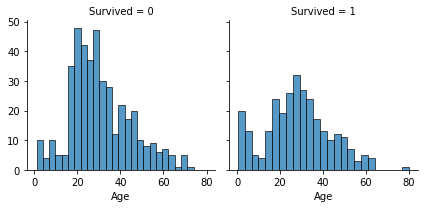

In [11]:
sns.FacetGrid(train, col="Survived").map(sns.histplot, "Age", bins=25)
plt.show()

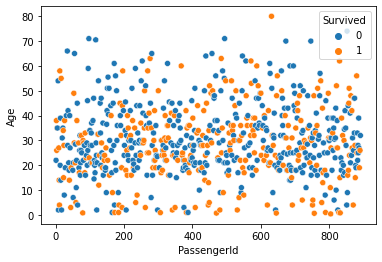

In [12]:
sns.scatterplot(x = train.PassengerId, y = train['Age'], hue = train['Survived'])
plt.show()

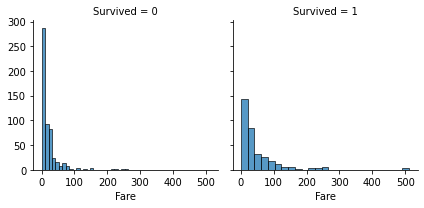

In [13]:
sns.FacetGrid(train, col="Survived").map(sns.histplot, "Fare", bins=25)
plt.show()

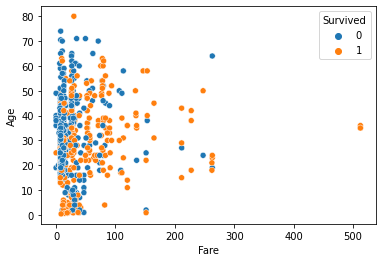

In [14]:
sns.scatterplot(x = train.Fare, y = train['Age'], hue = train['Survived'])
plt.show()

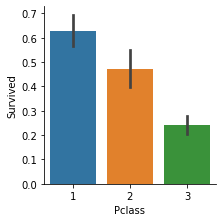

In [15]:
sns.catplot(x="Pclass", y ="Survived", data=train, kind="bar", height=3)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

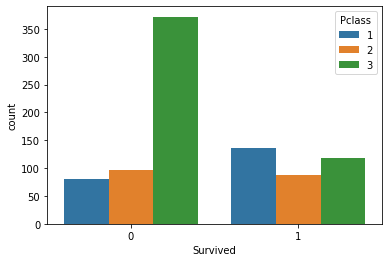

In [16]:
sns.countplot(x='Survived',hue='Pclass',data=train)

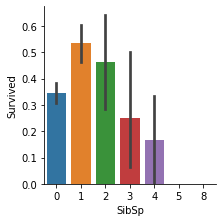

In [17]:
sns.catplot(x="SibSp", y ="Survived", data=train, kind="bar", height=3)
plt.show()

In [18]:
train[["Parch", "Survived"]].groupby(["Parch"], as_index = False).agg(['count','mean'])

Survived          
         count      mean
Parch                   
0          678  0.343658
1          118  0.550847
2           80  0.500000
3            5  0.600000
4            4  0.000000
5            5  0.200000
6            1  0.000000

In [19]:
train[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).agg(['count','mean'])

Survived          
            count      mean
Embarked                   
C             168  0.553571
Q              77  0.389610
S             644  0.336957

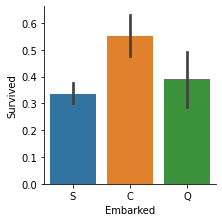

In [20]:
sns.catplot(x="Embarked", y ="Survived", data=train, kind="bar", height=3)
plt.show()

In [21]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [22]:
pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived],margins=True).style.background_gradient(cmap='summer_r')

#### Transformation to Features

In [23]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [24]:
train.Sex.unique()

array([0, 1])

In [25]:
embark = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embark)

In [26]:
test.Embarked.unique()

array([2, 0, 1])

In [28]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [29]:
train[train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8,NaN,2.0
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13,NaN,0.0
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7,NaN,1.0
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7,NaN,1.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",0,NaN,0,0,2629,7,NaN,1.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69,NaN,0.0
868,869,0,3,"van Melkebeke, Mr. Philemon",0,NaN,0,0,345777,9,NaN,0.0
878,879,0,3,"Laleff, Mr. Kristo",0,NaN,0,0,349217,7,NaN,0.0


In [30]:
data_train_test = pd.concat([train.assign(ind="train"), test.assign(ind="test")], ignore_index=True)

In [31]:
age_nan_pos = data_train_test[data_train_test["Age"].isnull()].index
for i in age_nan_pos:
    mean_age = data_train_test["Age"][((data_train_test["Title"] == data_train_test.iloc[i]["Title"]))].mean()
    data_train_test["Age"].iloc[i] = mean_age

KeyError: 'Title'

In [32]:
test, train = data_train_test[data_train_test["ind"].eq("test")], data_train_test[data_train_test["ind"].eq("train")]

In [33]:
train[train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind
5,6,0.0,3,"Moran, Mr. James",0,NaN,0,0,330877,8,NaN,2.0,train
17,18,1.0,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13,NaN,0.0,train
19,20,1.0,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7,NaN,1.0,train
26,27,0.0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7,NaN,1.0,train
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7,NaN,2.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0.0,3,"Razi, Mr. Raihed",0,NaN,0,0,2629,7,NaN,1.0,train
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69,NaN,0.0,train
868,869,0.0,3,"van Melkebeke, Mr. Philemon",0,NaN,0,0,345777,9,NaN,0.0,train
878,879,0.0,3,"Laleff, Mr. Kristo",0,NaN,0,0,349217,7,NaN,0.0,train


In [34]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 30), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 45), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 60), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 4


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [35]:
train.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [36]:
train.drop(labels=["Ticket","Cabin", "ind"], axis=1, inplace = True)
test.drop(labels=["Ticket","Cabin", "ind"], axis=1, inplace = True)

/Users/rsharankumar/opt/anaconda3/envs/DS100/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53,0.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8,0.0


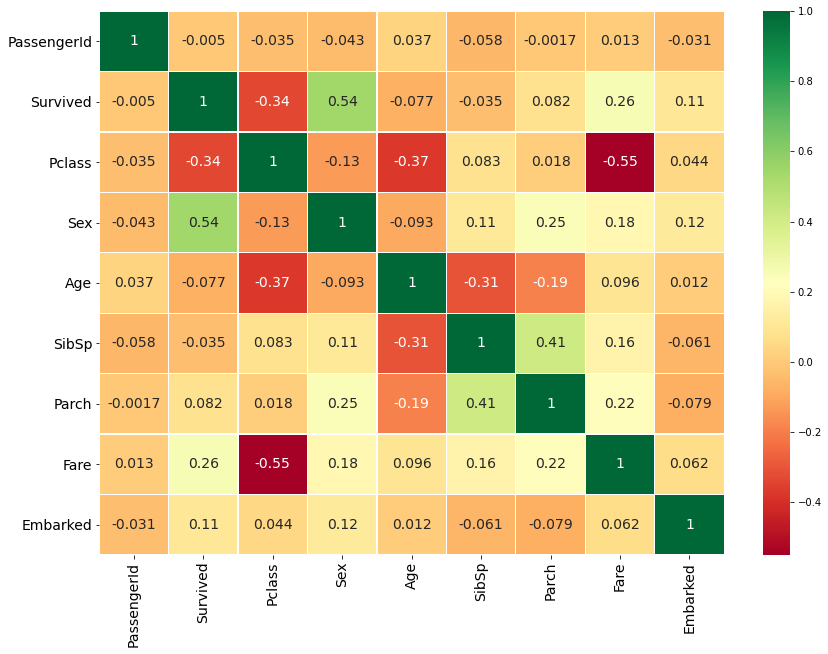

In [38]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#### Creating new features

In [39]:
data = [train, test]
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

<ipython-input-39-7063c218b003>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1


In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7,0.0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71,1.0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7,0.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53,0.0,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8,0.0,1


In [41]:
train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index = False).agg(['count','sum', 'mean'])

Survived                 
              count    sum      mean
FamilySize                          
1               537  163.0  0.303538
2               161   89.0  0.552795
3               102   59.0  0.578431
4                29   21.0  0.724138
5                15    3.0  0.200000
6                22    3.0  0.136364
7                12    4.0  0.333333
8                 6    0.0  0.000000
11                7    0.0  0.000000

In [42]:
data = [train, test]
for dataset in data:
    dataset['Age*Fare'] = dataset.Age * dataset.Fare

<ipython-input-42-f09d40a6b7c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age*Fare'] = dataset.Age * dataset.Fare


In [43]:
train.loc[:, ['Age*Fare', 'Age', 'Fare']].head(10)

,Age*Fare,Age,Fare
0,154.0,22.0,7
1,2698.0,38.0,71
2,182.0,26.0,7
3,1855.0,35.0,53
4,280.0,35.0,8
5,NaN,NaN,8
6,2754.0,54.0,51
7,42.0,2.0,21
8,297.0,27.0,11
9,420.0,14.0,30


In [44]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

train = train.drop(['Name'], axis=1)  
test = test.drop(['Name'], axis=1) 

<ipython-input-44-fef7d8bbe334>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
/Users/rsharankumar/opt/anaconda3/envs/DS100/lib/python3.8/site-packages/pandas/core/series.py:4575: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-44-fef7d8bbe334>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [45]:
data = [train, test]
for dataset in data:
    dataset['Fare'] = pd.qcut(dataset['Fare'], 13, labels=np.arange(13) + 1)

ValueError: Bin edges must be unique: array([  0.,   7.,   7.,   7.,   8.,  10.,  13.,  15.,  24.,  26.,  33.,
        55.,  83., 512.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [46]:
train.Fare.unique()

array([  7,  71,  53,   8,  51,  21,  11,  30,  16,  26,  31,  29,  13,
        18,  35, 263,  27, 146,  10,  82,  52,   9,  41,  15,  17,  39,
        76,  61,  46,  80,  83,  73,  14,  56,  12,  47,  34,  20,  63,
        23,  77,  24, 247,  22,   6,  79,  36,  66,  69,  55,  25,  33,
        28,   0,  50, 113,  90,  86, 512, 153, 135,  19,  78,  91, 151,
       110, 108, 262, 164, 134,  57, 133,  75, 211,   4, 227, 120,  32,
        81,  89,  38,  49,  59,  93, 221, 106,  40,  42,  65,  37,   5])